<a href="https://colab.research.google.com/github/shadab4150/Eye-Disease-Detection/blob/master/eye_disease_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=5e46d1424e311bdbdc025da25aa0bb1fd1e0c1e2fd0dfab8c7d02e13e8d5890a
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
from fastai.vision import *
import wget
import ipywidgets as widgets
from google.colab import files

In [0]:
url = 'https://drive.google.com/uc?export=download&id=1-2vMyvg8mBOpPAtes3C87IqJJeR3n0WX'

In [60]:
wget.download(url, '/content/sightnet.pkl')

'/content/sightnet.pkl'

In [0]:
learn = load_learner('/content/','sightnet.pkl')

In [0]:
classes = ['Normal', 'Diabetic', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia','Other_abnormalities']

In [0]:
def predict_eye(o): # file location
    uploaded = files.upload()
    for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn]))) 
    print('--'*25)
    print("Prediction :::")
    print('**'*25) 
    f = '/content/'+str(fn)
    img = open_image(f) 
    img.show(figsize=(12,6))
    p = learn.predict(img)[2].numpy()
    idx = []
    percent = []
    for i in range(8):
        if p[i]>0.3:
            idx.append(i)
            percent.append(p[i])
    pred = [str(classes[x])+" "+str(round(percent[x]*100,3)) +str(" % ") for x in range(len(idx))]
    pred = " : ".join(str(x) for x in pred)
    print(pred)

In [0]:
w = widgets.Button(description = 'Upload and Predict')
w.on_click(predict_eye);

Button(description='Upload and Predict', style=ButtonStyle())

Saving 100.png.png to 100.png (1).png
User uploaded file "100.png.png" with length 117203 bytes
--------------------------------------------------
Prediction :::
**************************************************
Normal 43.34 %  : Diabetic 32.303 %  : Glaucoma 30.105 % 


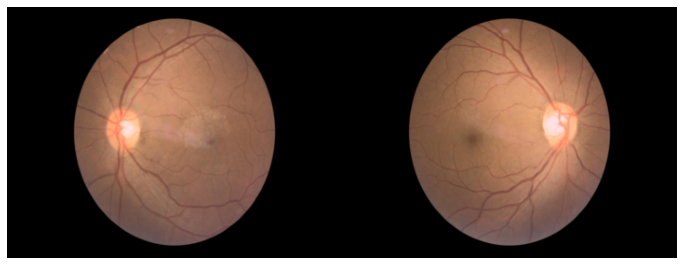

In [73]:
w